# Problem 1.

In [1]:
import numpy as np

class BayesianLinearRegression:
    def __init__(self, X, y, alpha = 1.0, beta = 1.0):
        self.X = X
        self.y = y
        self.alpha = alpha
        self.beta = beta
        self.jitter = 1e-8
      
    def fit_MLE(self): 
        xTx_inv = np.linalg.inv(np.matmul(self.X.T,self.X) + self.jitter)
        xTy = np.matmul(self.X.T, self.y)
        w_MLE = np.matmul(xTx_inv, xTy)
        self.w_MLE = w_MLE
        return w_MLE

    def fit_MAP(self): 
        Lambda = np.matmul(self.X.T,self.X) + (self.beta/self.alpha)*np.eye(self.X.shape[1])
        Lambda_inv = np.linalg.inv(Lambda)
        xTy = np.matmul(self.X.T, self.y)
        mu = np.matmul(Lambda_inv, xTy)
        self.w_MAP = mu
        self.Lambda_inv = Lambda_inv
        return mu, Lambda_inv
      
    def predictive_distribution(self, X_star):
        mean_star = np.matmul(X_star, self.w_MAP)
        var_star = 1.0/self.alpha + np.matmul(X_star, np.matmul(self.Lambda_inv, X_star.T))
        return mean_star, var_star


In [2]:
import matplotlib.pyplot as plt
from pyDOE import lhs
from scipy.stats import norm


In [3]:
class basis_functions:
    def __init__(self, order):  
        self.order = order
        
    def monomial_basis(self,x):
        points = np.ones((x.shape[0],self.order))
        for i in range(1,self.order):
            points[:,i] = x.T**i
        return points
    
    def identity_basis(self,x):
        points = np.ones((x.shape[0],1))
        points[:,0] = x.T
        return points
    
    def legendre_basis(self,x):
        N = x.shape[0]
        output = np.zeros((N,self.order))
        for i in range(self.order):
            infer = np.polynomial.legendre.Legendre.basis(i, [0, 3.])
            output[:,i:i+1] = infer(x)
        return output    
        
    def fourier_basis(self,x):
        points = np.ones((x.shape[0],2*self.order))
        for i in range(0,self.order):
            points[:,2*i] = np.sin(i*np.pi*x).T
            points[:,2*i+1] = np.cos(i*np.pi*x).T
        return points

(500, 1)
(500, 500)
(100, 500)


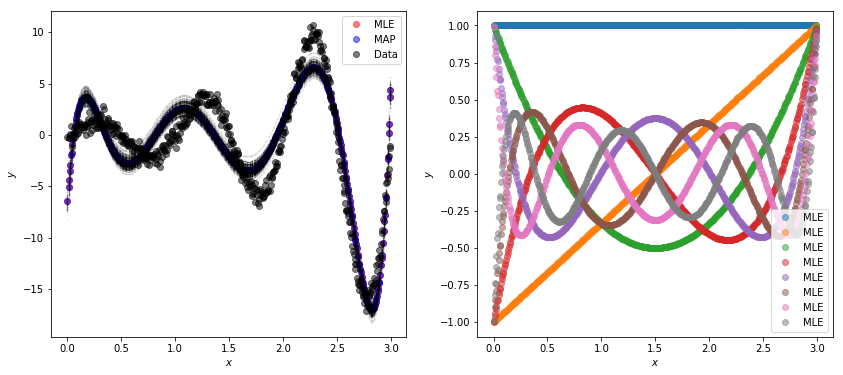

In [4]:
# N is the number of training points.
N = 500
M = 8
noise_var = 0.2
alpha = 5.
beta = 0.1

# Create random input and output data
X = 3. * lhs(1, N)

X = np.sort(X)
y = np.exp(X) * np.sin(2*np.pi*X) + 0.5*np.random.randn(N,1)

bases = basis_functions(M)
X_input = bases.legendre_basis(X)

# Define model
m = BayesianLinearRegression(X_input, y, alpha, beta)

# Fit MLE and MAP estimates for w
w_MLE = m.fit_MLE()
w_MAP, Lambda_inv = m.fit_MAP()


# Predict at a set of test points
X_star = X#np.linspace(0,2.,200)[:,None]
y_pred_MLE = np.matmul(X_input, w_MLE)
y_pred_MAP = np.matmul(X_input, w_MAP)

# Draw sampes from the predictive posterior
num_samples = 500
nn = 100
mean_star, var_star = m.predictive_distribution(X_input)

print(mean_star.shape)
print(var_star.shape)
samples = np.random.multivariate_normal(mean_star.flatten(), var_star, nn)
print(samples.shape)

# Plot
plt.figure(1, figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(X_star, y_pred_MLE, 'ro', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.plot(X_star, y_pred_MAP, 'bo', linewidth=2.0, label = 'MAP', alpha = 0.5)
for i in range(0, nn):
    plt.plot(X_star, samples[i,:].T, 'k.', alpha=0.1, markersize = 1.)
plt.plot(X,y,'ko', label = 'Data', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')

# Plot distribution of w
plt.subplot(1,2,2)
plt.plot(X, X_input, 'o', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

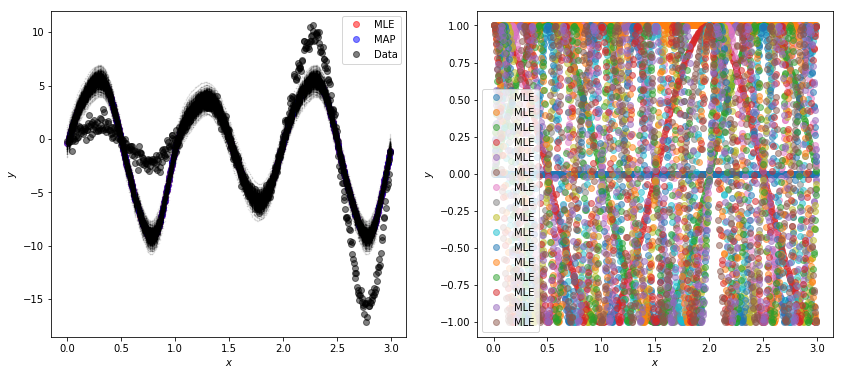

In [5]:
X_input = bases.fourier_basis(X)

# Define model
m = BayesianLinearRegression(X_input, y, alpha, beta)

# Fit MLE and MAP estimates for w
w_MLE = m.fit_MLE()
w_MAP, Lambda_inv = m.fit_MAP()


# Predict at a set of test points
X_star = X#np.linspace(0,2.,200)[:,None]
y_pred_MLE = np.matmul(X_input, w_MLE)
y_pred_MAP = np.matmul(X_input, w_MAP)

# Draw sampes from the predictive posterior
nn = 500
mean_star, var_star = m.predictive_distribution(X_input)

samples = np.random.multivariate_normal(mean_star.flatten(), var_star, nn)

# Plot
plt.figure(1, figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(X_star, y_pred_MLE, 'ro', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.plot(X_star, y_pred_MAP, 'bo', linewidth=2.0, label = 'MAP', alpha = 0.5)
for i in range(0, nn):
    plt.plot(X_star, samples[i,:].T, 'k.', alpha=0.1, markersize = 1.)
plt.plot(X,y,'ko', label = 'Data', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')

# Plot distribution of w
plt.subplot(1,2,2)
plt.plot(X, X_input, 'o', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

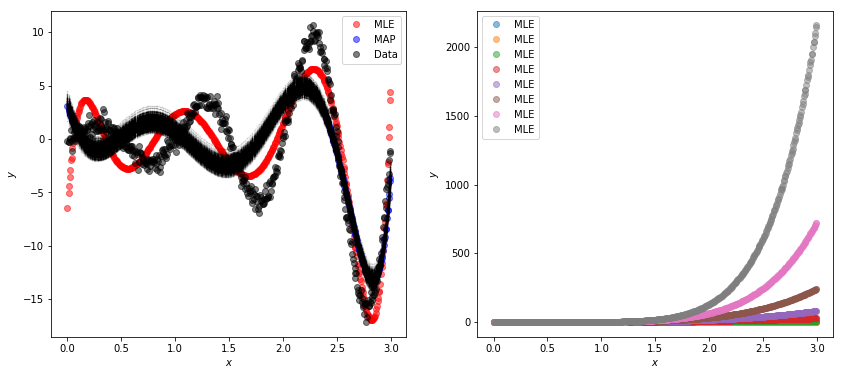

In [6]:
X_input = bases.monomial_basis(X)

# Define model
m = BayesianLinearRegression(X_input, y, alpha, beta)

# Fit MLE and MAP estimates for w
w_MLE = m.fit_MLE()
w_MAP, Lambda_inv = m.fit_MAP()


# Predict at a set of test points
X_star = X#np.linspace(0,2.,200)[:,None]
y_pred_MLE = np.matmul(X_input, w_MLE)
y_pred_MAP = np.matmul(X_input, w_MAP)

# Draw sampes from the predictive posterior
nn = 500
mean_star, var_star = m.predictive_distribution(X_input)

samples = np.random.multivariate_normal(mean_star.flatten(), var_star, nn)

# Plot
plt.figure(1, figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(X_star, y_pred_MLE, 'ro', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.plot(X_star, y_pred_MAP, 'bo', linewidth=2.0, label = 'MAP', alpha = 0.5)
for i in range(0, nn):
    plt.plot(X_star, samples[i,:].T, 'k.', alpha=0.1, markersize = 1.)
plt.plot(X,y,'ko', label = 'Data', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')

# Plot distribution of w
plt.subplot(1,2,2)
plt.plot(X, X_input, 'o', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

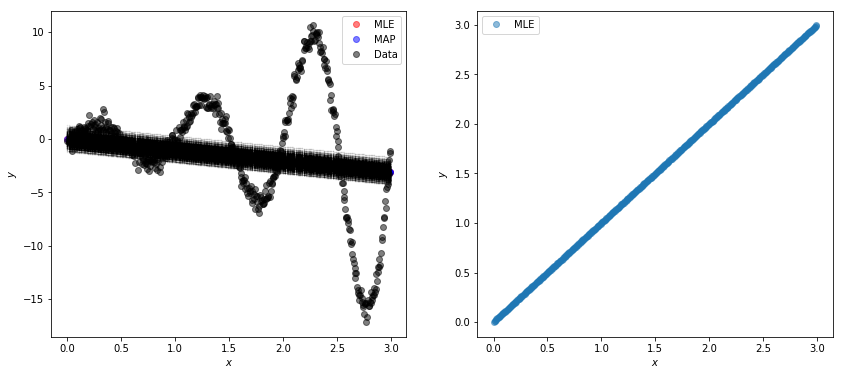

In [7]:
X_input = bases.identity_basis(X)


# Define model
m = BayesianLinearRegression(X_input, y, alpha, beta)

# Fit MLE and MAP estimates for w
w_MLE = m.fit_MLE()
w_MAP, Lambda_inv = m.fit_MAP()


# Predict at a set of test points
X_star = X#np.linspace(0,2.,200)[:,None]
y_pred_MLE = np.matmul(X_input, w_MLE)
y_pred_MAP = np.matmul(X_input, w_MAP)

# Draw sampes from the predictive posterior
nn = 500
mean_star, var_star = m.predictive_distribution(X_input)

samples = np.random.multivariate_normal(mean_star.flatten(), var_star, nn)

# Plot
plt.figure(1, figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(X_star, y_pred_MLE, 'ro', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.plot(X_star, y_pred_MAP, 'bo', linewidth=2.0, label = 'MAP', alpha = 0.5)
for i in range(0, nn):
    plt.plot(X_star, samples[i,:].T, 'k.', alpha=0.1, markersize = 1.)
plt.plot(X,y,'ko', label = 'Data', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')

# Plot distribution of w
plt.subplot(1,2,2)
plt.plot(X, X_input, 'o', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

/home/gkissas/anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: covariance is not symmetric positive-semidefinite.


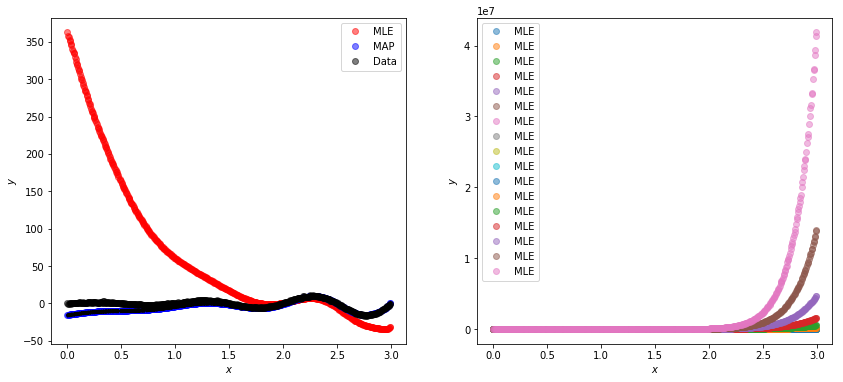

In [8]:
M = 17

bases = basis_functions(M)

X_input = bases.monomial_basis(X)


# Define model
m = BayesianLinearRegression(X_input, y, alpha, beta)

# Fit MLE and MAP estimates for w
w_MLE = m.fit_MLE()
w_MAP, Lambda_inv = m.fit_MAP()


# Predict at a set of test points
X_star = X#np.linspace(0,2.,200)[:,None]
y_pred_MLE = np.matmul(X_input, w_MLE)
y_pred_MAP = np.matmul(X_input, w_MAP)

# Draw sampes from the predictive posterior
nn = 500
mean_star, var_star = m.predictive_distribution(X_input)

samples = np.random.multivariate_normal(mean_star.flatten(), var_star, nn)

# Plot
plt.figure(1, figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(X_star, y_pred_MLE, 'ro', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.plot(X_star, y_pred_MAP, 'bo', linewidth=2.0, label = 'MAP', alpha = 0.5)
for i in range(0, nn):
    plt.plot(X_star, samples[i,:].T, 'k.', alpha=0.1, markersize = 1.)
plt.plot(X,y,'ko', label = 'Data', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')

# Plot distribution of w
plt.subplot(1,2,2)
plt.plot(X, X_input, 'o', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

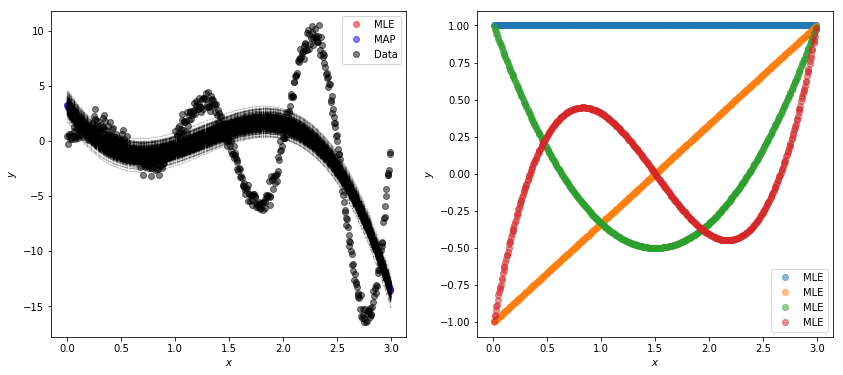

In [9]:
# N is the number of training points.
N = 500
M = 4
noise_var = 0.2
alpha = 5.
beta = 0.1

# Create random input and output data
X = 3. * lhs(1, N)

X = np.sort(X)
y = np.exp(X) * np.sin(2*np.pi*X) + 0.5*np.random.randn(N,1)

bases = basis_functions(M)
X_input = bases.legendre_basis(X)

# Define model
m = BayesianLinearRegression(X_input, y, alpha, beta)

# Fit MLE and MAP estimates for w
w_MLE = m.fit_MLE()
w_MAP, Lambda_inv = m.fit_MAP()


# Predict at a set of test points
X_star = X#np.linspace(0,2.,200)[:,None]
y_pred_MLE = np.matmul(X_input, w_MLE)
y_pred_MAP = np.matmul(X_input, w_MAP)

# Draw sampes from the predictive posterior
nn = 500
mean_star, var_star = m.predictive_distribution(X_input)

samples = np.random.multivariate_normal(mean_star.flatten(), var_star, nn)

# Plot
plt.figure(1, figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(X_star, y_pred_MLE, 'ro', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.plot(X_star, y_pred_MAP, 'bo', linewidth=2.0, label = 'MAP', alpha = 0.5)
for i in range(0, nn):
    plt.plot(X_star, samples[i,:].T, 'k.', alpha=0.1, markersize = 1.)
plt.plot(X,y,'ko', label = 'Data', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')

# Plot distribution of w
plt.subplot(1,2,2)
plt.plot(X, X_input, 'o', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()


The objective of this problem is to understand that when you use a large number of features and a small number of samples the basis functions tend to overfit. In this case this is presented using the monomial basis function. For Fourier and Legendre basis functions, the accuracy is becoming better as the order of the polynomial increases. The identity basis function is insensitive of the order. The best choice for this data-set would probably be the Legendre basis as it provides the best results in most cases. 

# Problem 2.

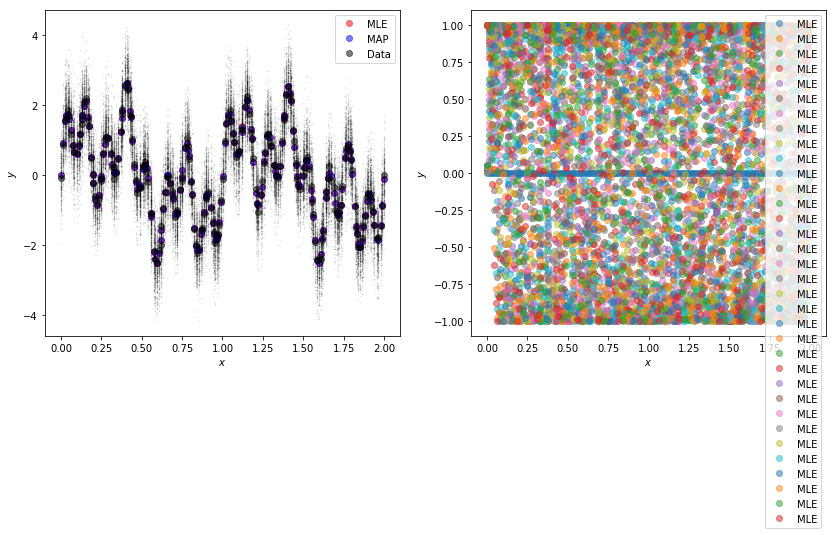

In [86]:
# N is the number of training points.
N = 200
M = 17
noise_var = 0.2
alpha = 5.
beta = 0.1

# Create random input and output data
X = 2. * lhs(1, N)

X = np.sort(X)
y = np.sin(2*np.pi*X) + np.sin(6*np.pi*X) + np.sin(16*np.pi*X) + 0.1*np.random.randn(N,1)

bases = basis_functions(M)
X_input = bases.fourier_basis(X)

# Define model
m = BayesianLinearRegression(X_input, y, alpha, beta)

# Fit MLE and MAP estimates for w
w_MLE = m.fit_MLE()
w_MAP, Lambda_inv = m.fit_MAP()


# Predict at a set of test points
X_star = X#np.linspace(0,2.,200)[:,None]
y_pred_MLE = np.matmul(X_input, w_MLE)
y_pred_MAP = np.matmul(X_input, w_MAP)

# Draw sampes from the predictive posterior
nn = 300
mean_star, var_star = m.predictive_distribution(X_input)

samples = np.random.multivariate_normal(mean_star.flatten(), var_star, nn)

# Plot
plt.figure(1, figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(X_star, y_pred_MLE, 'ro', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.plot(X_star, y_pred_MAP, 'bo', linewidth=2.0, label = 'MAP', alpha = 0.5)
for i in range(0, nn):
    plt.plot(X_star, samples[i,:].T, 'k.', alpha=0.1, markersize = 1.)
plt.plot(X,y,'ko', label = 'Data', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')

# Plot distribution of w
plt.subplot(1,2,2)
plt.plot(X, X_input, 'o', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

This function is constructed by sin functions of different frequencies, thus the Fourier basis is the one that will provide the best results due to its ability to approximate periodic functions. In order to approximate all the riding waves of the signal one need to use at least M = 16 or 32 features, to capture the wave of the maximum frequency.  